# Gabor Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Read datasets

In [2]:
product_columns = [
    "o_id", "o_parentId", "articleNumber", "articleNumber2", "brand__id", "mainCategory__id", "name", "description", "gender", "deliveryTime",
    "originCountry", "line", "b2cWebshopStatus", "b2cPrice", "b2cCurrency", "indicatorAdvertisement", "indicatorWedding", "indicatorSale",
    "mainImage", "additionalImage1", "additionalImage2", "additionalImage3", "additionalImage4", "additionalImage5",
    "weight__unit", "weight__value", "material", "materialPm", "color", "closure",
    "relationsUpSelling", "relationsColors"
] # used for assign product values to new csv

In [3]:
def base_information_dataset(df):
    print(df.shape)
    display(df.head())
    display(df.describe())
    display(df.isnull().sum())

### Bag Data

In [4]:
df_bag_data = pd.read_csv('../datasets/gabor/Gabor_Bag_Data.csv')
base_information_dataset(df_bag_data)

(252, 9)


,o_id,fieldname,height__value,height__unit,length__value,length__unit,width__value,width__unit,formGroup
0,9331625,attributes,10.5,1,17.0,1,3.0,1,NaN
1,9331626,attributes,10.5,1,17.0,1,3.0,1,NaN
2,9331649,attributes,23.5,1,25.0,1,6.5,1,NaN
3,9331650,attributes,23.5,1,25.0,1,6.5,1,NaN
4,9331652,attributes,23.5,1,25.0,1,6.5,1,NaN


,o_id,height__value,height__unit,length__value,length__unit,width__value,width__unit,formGroup
count,2.520000e+02,252.000000,252.0,252.000000,252.0,252.000000,252.0,0.0
mean,1.046135e+07,24.070635,1.0,29.797222,1.0,10.289683,1.0,NaN
std,5.639794e+05,6.591677,0.0,8.570590,0.0,4.517277,0.0,NaN
min,9.331625e+06,7.700000,1.0,10.800000,1.0,2.500000,1.0,NaN
25%,1.077090e+07,21.000000,1.0,24.000000,1.0,7.000000,1.0,NaN
50%,1.078275e+07,25.000000,1.0,28.000000,1.0,11.000000,1.0,NaN
75%,1.078282e+07,29.000000,1.0,36.000000,1.0,13.625000,1.0,NaN
max,1.078288e+07,41.000000,1.0,47.000000,1.0,18.500000,1.0,NaN


o_id               0
fieldname          0
height__value      0
height__unit       0
length__value      0
length__unit       0
width__value       0
width__unit        0
formGroup        252
dtype: int64

form group column can be deleted, every other column looks good



In [5]:
df_bag_data = df_bag_data.drop(columns=['formGroup'])
df_bag_data.head()

,o_id,fieldname,height__value,height__unit,length__value,length__unit,width__value,width__unit
0,9331625,attributes,10.5,1,17.0,1,3.0,1
1,9331626,attributes,10.5,1,17.0,1,3.0,1
2,9331649,attributes,23.5,1,25.0,1,6.5,1
3,9331650,attributes,23.5,1,25.0,1,6.5,1
4,9331652,attributes,23.5,1,25.0,1,6.5,1


### Brand:

In [6]:
# todo fix first parentid
df_brand = pd.read_csv('../datasets/gabor/Gabor_Brand.csv')
base_information_dataset(df_brand)

(11, 3)


,o_parentId,o_parentId.1,name
0,11,11,NaN
1,509,509,Gabor
2,509,509,Gabor comfort
3,509,509,rollingsoft
4,509,509,Gabor Sport


,o_parentId,o_parentId.1
count,11.000000,11.000000
mean,463.727273,463.727273
std,150.152650,150.152650
min,11.000000,11.000000
25%,509.000000,509.000000
50%,509.000000,509.000000
75%,509.000000,509.000000
max,509.000000,509.000000


o_parentId      0
o_parentId.1    0
name            1
dtype: int64

nothing to do, only base category is null


### Categories

In [7]:
df_categories = pd.read_csv('../datasets/gabor/Gabor_Categories.csv')
base_information_dataset(df_categories)

(73, 5)


,o_id,o_parentId,name,description,gender
0,19,12,NaN,NaN,NaN
1,315558,19,Shoes,NaN,NaN
2,315559,315558,Ladies shoes,NaN,/System/Optionen/Produktattribute/gender/w
3,315560,315559,Pumps,NaN,/System/Optionen/Produktattribute/gender/w
4,315561,315560,Buckle pumps,NaN,/System/Optionen/Produktattribute/gender/w


,o_id,o_parentId,description
count,7.300000e+01,7.300000e+01,0.0
mean,2.019356e+06,1.323144e+06,NaN
std,2.883270e+06,2.143116e+06,NaN
min,1.900000e+01,1.200000e+01,NaN
25%,3.155750e+05,3.155600e+05,NaN
50%,3.155940e+05,3.155780e+05,NaN
75%,3.692263e+06,3.630150e+05,NaN
max,1.064827e+07,8.756144e+06,NaN


o_id            0
o_parentId      0
name            1
description    73
gender          2
dtype: int64

first row can be deleted
todo etwas mit leeren desciption values machen
gender 2 mall null => evtl droppen oder als unisex bewerten



In [8]:
df_categories['gender'] = df_categories['gender'].map({'/System/Optionen/Produktattribute/gender/w': 'w', '/System/Optionen/Produktattribute/gender/m': 'm'})
df_categories['gender'] = df_categories['gender'].fillna('u')
df_categories['description'] = df_categories['description'].fillna('')

In [9]:
df_categories = df_categories.drop(0)

In [10]:
df_categories.head()

,o_id,o_parentId,name,description,gender
1,315558,19,Shoes,,u
2,315559,315558,Ladies shoes,,w
3,315560,315559,Pumps,,w
4,315561,315560,Buckle pumps,,w
5,315562,315559,Sandals,,w


### Order items

In [11]:
df_orderitems = pd.read_csv('../datasets/gabor/Gabor_Orderitems.csv')
base_information_dataset(df_orderitems)

(672349, 11)


,o_id,orderState,product__id,productNumber,productName,amount,totalPrice,productSizeEu,productColorName,baseUnitPrice,discountAmount
0,2516728,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,schwarz,NaN,NaN
1,2516738,committed,551622,4054452768212,elegante Pumps Glattleder schwarz,1,79.95,38.0,schwarz,NaN,NaN
2,2516897,committed,547193,4054452768427,Slipper Glattleder schwarz,1,69.95,42.0,schwarz,NaN,NaN
3,2517058,committed,549776,4059701687894,Sneaker low Rauleder blau,1,130.00,39.0,blau,NaN,NaN
4,2517149,committed,550599,4056067216898,Sneaker low Rauleder blau,1,99.95,42.5,blau,NaN,NaN


,o_id,product__id,productNumber,amount,totalPrice,productSizeEu,baseUnitPrice,discountAmount
count,6.723490e+05,6.723490e+05,6.723490e+05,672349.000000,672349.000000,671862.000000,460703.000000,353.000000
mean,7.711935e+06,6.287516e+06,4.063618e+12,1.003110,107.947700,39.613114,115.924769,11.291360
std,2.143101e+06,2.357284e+06,5.419267e+09,0.058086,28.486357,2.180808,25.684321,9.508245
min,2.516728e+06,3.608240e+05,4.054453e+12,1.000000,0.000000,35.000000,35.990000,10.000000
25%,5.833031e+06,4.769551e+06,4.062863e+12,1.000000,89.950000,38.000000,99.950000,10.000000
50%,7.854362e+06,6.282501e+06,4.064032e+12,1.000000,99.950000,39.000000,115.000000,10.000000
75%,9.625975e+06,8.489278e+06,4.065171e+12,1.000000,125.000000,41.000000,130.000000,10.000000
max,1.112813e+07,1.110352e+07,4.255620e+12,5.000000,500.000000,49.500000,270.000000,160.000000


o_id                     0
orderState           23838
product__id              0
productNumber            0
productName              0
amount                   0
totalPrice               0
productSizeEu          487
productColorName      9821
baseUnitPrice       211646
discountAmount      671996
dtype: int64

In [12]:
df_orderitems[df_orderitems['productSizeEu'].isnull()] ## if product size == pocket # todo
df_orderitems[df_orderitems['productColorName'].isnull()] ## change to empty value
df_orderitems[df_orderitems['baseUnitPrice'].notnull()] ## delete column no real purpose
df_orderitems[df_orderitems['discountAmount'].notnull()] ## just 350 entries => delete column
df_orderitems[df_orderitems['orderState'].isnull()] ## delete entries => order state must be committed

,o_id,orderState,product__id,productNumber,productName,amount,totalPrice,productSizeEu,productColorName,baseUnitPrice,discountAmount
2588,3448466,NaN,360837,4054452742083,Zehentrenner Glattleder schwarz,1,69.95,38.0,schwarz,NaN,NaN
2669,3486561,NaN,550727,4054452851600,Eleganter Ballerina Materialmix Lederimitat sc...,1,69.95,38.0,schwarz,NaN,NaN
2688,3490997,NaN,589482,4056068820650,Sportliche Ballerina Glattleder schwarz,1,79.95,40.0,schwarz,NaN,NaN
2782,3507939,NaN,360836,4054452742076,Zehentrenner Glattleder schwarz,1,69.95,37.0,schwarz,NaN,NaN
2783,3507944,NaN,360836,4054452742076,Zehentrenner Glattleder schwarz,1,69.95,37.0,schwarz,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
672314,11127898,NaN,553962,4054452768076,Eleganter Pumps Glattleder Blau,1,89.95,38.5,Blau,89.95,NaN
672337,11128067,NaN,10238971,4065171801067,Riemchensandale Glattleder schwarz,1,99.95,43.0,schwarz,99.95,NaN
672343,11128110,NaN,10238971,4065171801067,Riemchensandale Glattleder schwarz,1,99.95,43.0,schwarz,99.95,NaN
672345,11128123,NaN,10558727,4065171978462,Sneaker low Glattleder multicolour,2,280.00,38.5,multicolour,140.00,NaN


In [13]:
df_orderitems = df_orderitems.dropna(subset=['orderState'])
df_orderitems['productColorName'] = df_orderitems['productColorName'].fillna('')
df_orderitems['productSizeEu'] = df_orderitems['productSizeEu'].fillna('')
df_orderitems = df_orderitems.drop(columns=['baseUnitPrice', 'discountAmount'])

In [14]:
df_orderitems.head()

,o_id,orderState,product__id,productNumber,productName,amount,totalPrice,productSizeEu,productColorName
0,2516728,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,schwarz
1,2516738,committed,551622,4054452768212,elegante Pumps Glattleder schwarz,1,79.95,38.0,schwarz
2,2516897,committed,547193,4054452768427,Slipper Glattleder schwarz,1,69.95,42.0,schwarz
3,2517058,committed,549776,4059701687894,Sneaker low Rauleder blau,1,130.00,39.0,blau
4,2517149,committed,550599,4056067216898,Sneaker low Rauleder blau,1,99.95,42.5,blau


discountAmount can be dropped


### Orders

In [15]:
df_orders = pd.read_csv('../datasets/gabor/Gabor_Orders.csv')
base_information_dataset(df_orders)

(687868, 6)


,o_id,orderdate,totalPrice,currency,customer__id,items
0,284686,1578023100,200.00,EUR,NaN,",284715,284717,284776,"
1,2516684,1577837740,120.00,EUR,2302078.0,",2516685,"
2,2516686,1577844421,276.95,EUR,2188533.0,",2516687,2516688,2516689,2516690,"
3,2516691,1577861367,120.00,EUR,2302081.0,",2516692,"
4,2516693,1577864086,219.95,EUR,2302084.0,",2516694,2516695,"


,o_id,orderdate,totalPrice,customer__id
count,6.878680e+05,6.878680e+05,687868.000000,6.845660e+05
mean,6.728457e+06,1.630554e+09,170.378086,5.861563e+06
std,2.511329e+06,2.843918e+07,111.284883,2.859958e+06
min,2.846860e+05,1.577838e+09,0.000000,1.940761e+06
25%,4.656816e+06,1.605357e+09,99.950000,3.382538e+06
50%,6.748230e+06,1.630666e+09,125.000000,5.754142e+06
75%,8.921528e+06,1.655566e+09,200.000000,8.307013e+06
max,1.112814e+07,1.679568e+09,1124.660000,1.112815e+07


o_id               0
orderdate          0
totalPrice         0
currency           0
customer__id    3302
items           2327
dtype: int64

orders without customer id and without bought items can be deleted => no value



In [16]:
df_orders = df_orders.dropna(subset=['customer__id'])
df_orders = df_orders.dropna(subset=['items'])

In [17]:
df_orders.head()

,o_id,orderdate,totalPrice,currency,customer__id,items
1,2516684,1577837740,120.00,EUR,2302078.0,",2516685,"
2,2516686,1577844421,276.95,EUR,2188533.0,",2516687,2516688,2516689,2516690,"
3,2516691,1577861367,120.00,EUR,2302081.0,",2516692,"
4,2516693,1577864086,219.95,EUR,2302084.0,",2516694,2516695,"
5,2516696,1577864233,339.00,EUR,2137627.0,",2516697,2516698,2516699,"


### Product Data

In [18]:
df_product_data = pd.read_csv('../datasets/gabor/Gabor_Product_Data_new.csv', low_memory=False)
base_information_dataset(df_product_data)

(173723, 32)


,o_id,o_parentId,articleNumber,articleNumber2,brand__id,mainCategory__id,name,description,gender,deliveryTime,originCountry,line,b2cWebshopStatus,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,mainImage,additionalImage1,additionalImage2,additionalImage3,additionalImage4,additionalImage5,weight__unit,weight__value,material,materialPm,color,closure,relationsUpSelling,relationsColors
0,315682,315607,26.063.48,26.063.48,6590678,315563,Strappy sandal Full-grain leather red,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,0,799175.0,799170.0,799171.0,799172.0,799173.0,799174.0,3,0.95,/System/Optionen/Produktattribute/material/Rau...,Soft Nubuk,/System/Optionen/Produktattribute/color/rot,/System/Optionen/Produktattribute/closure/Klet...,",587432,321286,321382,321506,330258,",",7588407,588156,587933,588370,"
1,315997,315611,81.530.12,81.530.12,6590677,315565,Sling pump Full-grain leather beige,NaN,/System/Optionen/Produktattribute/gender/w,NaN,PT,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,1,591149.0,591144.0,591145.0,591146.0,591147.0,591148.0,3,0.88,/System/Optionen/Produktattribute/material/Rau...,Samtchevreau,/System/Optionen/Produktattribute/color/beige,/System/Optionen/Produktattribute/closure/Gumm...,",7895518,",",7992534,588425,7588504,320600,7951643,7588330,"
2,316061,315689,62.642.35,62.642.35,6590678,315588,Wedged pump Full-grain leather pink,NaN,/System/Optionen/Produktattribute/gender/w,NaN,PT,/System/Optionen/Produktattribute/line/F-S,0.0,NaN,NaN,0.0,0.0,1,459559.0,459554.0,459555.0,459556.0,459557.0,459558.0,3,0.64,/System/Optionen/Produktattribute/material/Rau...,Soft Nubuk,/System/Optionen/Produktattribute/color/rosa,NaN,",5077031,",",318080,320304,5335437,335087,"
3,316138,315640,06.210.16,06.210.16,6590678,315573,Elegant pumps Imitation leather blue,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,0,760209.0,760204.0,760205.0,760206.0,760207.0,760208.0,3,0.73,/System/Optionen/Produktattribute/material/Led...,Microvelour HT,/System/Optionen/Produktattribute/color/blau,NaN,",7870291,337153,",",7870291,337153,"
4,316554,315640,92.221.47,92.221.47,6590678,315573,Elegant pumps Full-grain leather black,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/H-W,1.0,NaN,NaN,0.0,0.0,1,695154.0,695149.0,695150.0,695151.0,695152.0,695153.0,3,0.77,/System/Optionen/Produktattribute/material/Rau...,Samtchevreau,/System/Optionen/Produktattribute/color/schwarz,NaN,",8962773,",",9164918,8962807,7588350,"


,o_id,o_parentId,brand__id,mainCategory__id,deliveryTime,b2cWebshopStatus,b2cPrice,indicatorAdvertisement,indicatorWedding,indicatorSale,mainImage,additionalImage1,additionalImage2,additionalImage3,additionalImage4,additionalImage5,weight__unit,weight__value
count,1.737230e+05,1.737230e+05,1.737230e+05,1.737230e+05,0.0,11407.000000,162568.000000,173471.000000,173471.000000,173723.000000,173290.000000,173290.000000,173273.000000,173255.000000,172770.000000,172533.000000,173723.0,173723.000000
mean,7.088279e+06,5.985804e+06,6.305012e+06,9.057713e+05,NaN,0.752433,115.360479,0.010221,0.001182,0.880828,593183.074447,593169.548860,593174.123597,593145.668044,593242.255120,593170.120957,3.0,0.861023
std,2.376942e+06,3.105705e+06,7.891150e+05,1.512729e+06,NaN,0.523921,23.952120,0.100580,0.034356,0.323992,140494.436730,140503.987475,140494.705945,140494.760606,140135.475389,140328.118989,0.0,0.306806
min,3.156820e+05,3.156040e+05,3.630130e+05,3.155610e+05,NaN,0.000000,35.990000,0.000000,0.000000,0.000000,1769.000000,1766.000000,1768.000000,1767.000000,3953.000000,3954.000000,3.0,0.000000
25%,4.978064e+06,3.907614e+06,6.590677e+06,3.155670e+05,NaN,0.000000,99.950000,0.000000,0.000000,1.000000,474587.000000,474582.000000,474583.000000,474552.000000,474681.000000,474554.000000,3.0,0.630000
50%,7.593142e+06,6.406307e+06,6.590677e+06,3.155730e+05,NaN,1.000000,110.000000,0.000000,0.000000,1.000000,599555.000000,599518.000000,599519.000000,599520.000000,599585.000000,599522.000000,3.0,0.810000
75%,8.807220e+06,8.499437e+06,6.590678e+06,3.155870e+05,NaN,1.000000,130.000000,0.000000,0.000000,1.000000,717720.000000,717747.000000,717716.000000,717685.000000,717590.000000,717687.000000,3.0,1.060000
max,1.111392e+07,1.111390e+07,6.590678e+06,1.064827e+07,NaN,2.000000,270.000000,1.000000,1.000000,1.000000,813799.000000,813794.000000,813795.000000,813796.000000,813797.000000,813798.000000,3.0,2.070000


o_id                           0
o_parentId                     0
articleNumber                  0
articleNumber2                 0
brand__id                      0
mainCategory__id               0
name                           0
description               173439
gender                         0
deliveryTime              173723
originCountry                252
line                           0
b2cWebshopStatus          162316
b2cPrice                   11155
b2cCurrency                11155
indicatorAdvertisement       252
indicatorWedding             252
indicatorSale                  0
mainImage                    433
additionalImage1             433
additionalImage2             450
additionalImage3             468
additionalImage4             953
additionalImage5            1190
weight__unit                   0
weight__value                  0
material                       0
materialPm                     0
color                          0
closure                    29890
relationsU

columns with to many null values or no information value:
closure, relationsUpSelling, relationsColors, images, deliveryTime, description (most of the time null), b2cWebshopStatus

rows wo null droppen:
b2cPrice => drop rows where null, because it cannot be sold to regular customers without price, automatically drops b2cCurrency

handle null values
indicatorWedding indicatorAdvertisement: if null => is bag, if null fill with 0.0
originCountry => nan to DE

change values:
line and gender: remove path
description: fill null with empty # todo


weiter anschauen:

deliveryTime: evtl 0 oder max oder default setzen





In [19]:
#df_product_data.indicatorWedding.unique()
df_product_data.b2cWebshopStatus.unique()
df_product_data.line.unique()
df_product_data.deliveryTime.unique()
df_product_data.color.unique()
df_product_data.material.unique()

array(['/System/Optionen/Produktattribute/material/Rauleder',
       '/System/Optionen/Produktattribute/material/Lederimitat',
       '/System/Optionen/Produktattribute/material/Glattleder',
       '/System/Optionen/Produktattribute/material/Textil',
       '/System/Optionen/Produktattribute/material/Effektleder',
       '/System/Optionen/Produktattribute/material/Materialmix Leder',
       '/System/Optionen/Produktattribute/material/Lackleder',
       '/System/Optionen/Produktattribute/material/Materialmix Leder-Lederimitat',
       '/System/Optionen/Produktattribute/material/Leder Reptiloptik',
       '/System/Optionen/Produktattribute/material/Materialmix Lederimitat',
       '/System/Optionen/Produktattribute/material/Materialmix Leder-Textil',
       '/System/Optionen/Produktattribute/material/Wolle',
       '/System/Optionen/Produktattribute/material/Kunstleder',
       '/System/Optionen/Produktattribute/material/Canvas'], dtype=object)

In [20]:
#df_product_data[df_product_data['productSizeEu'].isnull()]
df_product_data[df_product_data['indicatorAdvertisement'].isnull()]
df_product_data[df_product_data['b2cPrice'].isnull()]
df_product_data[df_product_data['deliveryTime'].notnull()]
df_product_data[df_product_data['description'].notnull()]
df_product_data[df_product_data['b2cWebshopStatus'].notnull()]


,o_id,o_parentId,articleNumber,articleNumber2,brand__id,mainCategory__id,name,description,gender,deliveryTime,originCountry,line,b2cWebshopStatus,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,mainImage,additionalImage1,additionalImage2,additionalImage3,additionalImage4,additionalImage5,weight__unit,weight__value,material,materialPm,color,closure,relationsUpSelling,relationsColors
0,315682,315607,26.063.48,26.063.48,6590678,315563,Strappy sandal Full-grain leather red,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,0,799175.0,799170.0,799171.0,799172.0,799173.0,799174.0,3,0.95,/System/Optionen/Produktattribute/material/Rau...,Soft Nubuk,/System/Optionen/Produktattribute/color/rot,/System/Optionen/Produktattribute/closure/Klet...,",587432,321286,321382,321506,330258,",",7588407,588156,587933,588370,"
1,315997,315611,81.530.12,81.530.12,6590677,315565,Sling pump Full-grain leather beige,NaN,/System/Optionen/Produktattribute/gender/w,NaN,PT,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,1,591149.0,591144.0,591145.0,591146.0,591147.0,591148.0,3,0.88,/System/Optionen/Produktattribute/material/Rau...,Samtchevreau,/System/Optionen/Produktattribute/color/beige,/System/Optionen/Produktattribute/closure/Gumm...,",7895518,",",7992534,588425,7588504,320600,7951643,7588330,"
2,316061,315689,62.642.35,62.642.35,6590678,315588,Wedged pump Full-grain leather pink,NaN,/System/Optionen/Produktattribute/gender/w,NaN,PT,/System/Optionen/Produktattribute/line/F-S,0.0,NaN,NaN,0.0,0.0,1,459559.0,459554.0,459555.0,459556.0,459557.0,459558.0,3,0.64,/System/Optionen/Produktattribute/material/Rau...,Soft Nubuk,/System/Optionen/Produktattribute/color/rosa,NaN,",5077031,",",318080,320304,5335437,335087,"
3,316138,315640,06.210.16,06.210.16,6590678,315573,Elegant pumps Imitation leather blue,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,0,760209.0,760204.0,760205.0,760206.0,760207.0,760208.0,3,0.73,/System/Optionen/Produktattribute/material/Led...,Microvelour HT,/System/Optionen/Produktattribute/color/blau,NaN,",7870291,337153,",",7870291,337153,"
4,316554,315640,92.221.47,92.221.47,6590678,315573,Elegant pumps Full-grain leather black,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/H-W,1.0,NaN,NaN,0.0,0.0,1,695154.0,695149.0,695150.0,695151.0,695152.0,695153.0,3,0.77,/System/Optionen/Produktattribute/material/Rau...,Samtchevreau,/System/Optionen/Produktattribute/color/schwarz,NaN,",8962773,",",9164918,8962807,7588350,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173640,11103463,315616,22.862.57,22.862.57,6590678,315568,Platform sandal Smooth leather black,NaN,/System/Optionen/Produktattribute/gender/w,NaN,PT,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,1,813717.0,813712.0,813713.0,813714.0,813715.0,813716.0,3,1.12,/System/Optionen/Produktattribute/material/Gla...,Nappa,/System/Optionen/Produktattribute/color/schwarz,/System/Optionen/Produktattribute/closure/Klet...,",10365600,10359355,10359359,10501416,10459668,",NaN
173641,11103464,315609,22.813.50,22.813.50,6590678,315564,Wedge sandal Smooth leather white,NaN,/System/Optionen/Produktattribute/gender/w,NaN,SK,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,1,813621.0,813616.0,813617.0,813618.0,813619.0,813620.0,3,0.96,/System/Optionen/Produktattribute/material/Gla...,Nappa,/System/Optionen/Produktattribute/color/weiß,/System/Optionen/Produktattribute/closure/Klet...,",10459660,10459634,10359368,10451117,10558435,",NaN
173642,11103467,315679,23.160.32,23.160.32,6590677,315586,High sneaker Material mix leather beige,NaN,/System/Optionen/Produktattribute/gender/w,NaN,PT,/System/Optionen/Produktattribute/line/F-S,1.0,NaN,NaN,0.0,0.0,1,813685.0,813680.0,813681.0,813

In [21]:
df_product_data['productType'] = df_product_data['indicatorWedding'].apply(lambda x: 'shoe' if pd.notna(x) else 'bag') ## add column if is shoe or bag

In [22]:
df_product_data['indicatorWedding'] = df_product_data['indicatorWedding'].fillna(0.0)
df_product_data['indicatorAdvertisement'] = df_product_data['indicatorAdvertisement'].fillna(0.0)
df_product_data['originCountry'] = df_product_data['originCountry'].fillna('DE')
df_product_data['description'] = df_product_data['description'].fillna('')

df_product_data = df_product_data.drop(columns=['closure', 'relationsUpSelling', 'relationsColors', 'mainImage', 'additionalImage1','additionalImage2','additionalImage3','additionalImage4','additionalImage5', 'description', 'deliveryTime', 'b2cWebshopStatus'])
df_product_data = df_product_data.dropna(subset=['b2cPrice']) # does drop all null b2cWebshopStatus too

df_product_data['line'] = df_product_data['line'].map({
    '/System/Optionen/Produktattribute/line/F-S': 'F-S',
    '/System/Optionen/Produktattribute/line/H-W': 'H-W',
    '/System/Optionen/Produktattribute/line/F-S|H-W': 'F-S|H-W'
})
df_product_data['gender'] = df_product_data['gender'].map({'/System/Optionen/Produktattribute/gender/w': 'w', '/System/Optionen/Produktattribute/gender/m': 'm'})
df_product_data['color'] = df_product_data['color'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/color/', ''))
df_product_data['material'] = df_product_data['material'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/material/', ''))


In [23]:
base_information_dataset(df_product_data)


(162568, 21)


,o_id,o_parentId,articleNumber,articleNumber2,brand__id,mainCategory__id,name,gender,originCountry,line,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__unit,weight__value,material,materialPm,color,productType
503,360824,317091,03.700.13,03.700.13,6590677,315594,Toe separator Full-grain leather brown,w,SK,F-S,79.95,EUR,0.0,0.0,0,3,0.57,Rauleder,Nubuk Lavato,braun,shoe
504,360825,317091,03.700.13,03.700.13,6590677,315594,Toe separator Full-grain leather brown,w,SK,F-S,79.95,EUR,0.0,0.0,0,3,0.57,Rauleder,Nubuk Lavato,braun,shoe
505,360826,317091,03.700.13,03.700.13,6590677,315594,Toe separator Full-grain leather brown,w,SK,F-S,79.95,EUR,0.0,0.0,0,3,0.57,Rauleder,Nubuk Lavato,braun,shoe
506,360827,317091,03.700.13,03.700.13,6590677,315594,Toe separator Full-grain leather brown,w,SK,F-S,79.95,EUR,0.0,0.0,0,3,0.57,Rauleder,Nubuk Lavato,braun,shoe
507,360828,317091,03.700.13,03.700.13,6590677,315594,Toe separator Full-grain leather brown,w,SK,F-S,79.95,EUR,0.0,0.0,0,3,0.57,Rauleder,Nubuk Lavato,braun,shoe


,o_id,o_parentId,brand__id,mainCategory__id,b2cPrice,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__unit,weight__value
count,1.625680e+05,1.625680e+05,1.625680e+05,1.625680e+05,162568.000000,162568.000000,162568.000000,162568.000000,162568.0,162568.000000
mean,7.135803e+06,6.334273e+06,6.303828e+06,9.056657e+05,115.360479,0.010180,0.001169,0.881606,3.0,0.848094
std,2.332297e+06,2.873020e+06,7.920261e+05,1.511116e+06,23.952120,0.100383,0.034167,0.323075,0.0,0.303929
min,3.608240e+05,3.156820e+05,3.630130e+05,3.155610e+05,35.990000,0.000000,0.000000,0.000000,3.0,0.000000
25%,4.978938e+06,4.113916e+06,6.590677e+06,3.155670e+05,99.950000,0.000000,0.000000,1.000000,3.0,0.620000
50%,7.594346e+06,6.551835e+06,6.590677e+06,3.155730e+05,110.000000,0.000000,0.000000,1.000000,3.0,0.790000
75%,8.807740e+06,8.629854e+06,6.590678e+06,3.155870e+05,130.000000,0.000000,0.000000,1.000000,3.0,1.050000
max,1.111392e+07,1.111390e+07,6.590678e+06,1.064827e+07,270.000000,1.000000,1.000000,1.000000,3.0,2.070000


o_id                      0
o_parentId                0
articleNumber             0
articleNumber2            0
brand__id                 0
mainCategory__id          0
name                      0
gender                    0
originCountry             0
line                      0
b2cPrice                  0
b2cCurrency               0
indicatorAdvertisement    0
indicatorWedding          0
indicatorSale             0
weight__unit              0
weight__value             0
material                  0
materialPm                0
color                     0
productType               0
dtype: int64

In [24]:
### Shoe Data

In [25]:
df_shoe_data = pd.read_csv('../datasets/gabor/Gabor_Shoe_Data.csv',low_memory=False)
base_information_dataset(df_shoe_data)

(173478, 29)


,o_id,fieldname,heelForm,style,shoeTip,shaftWidth,lining,heelHeight__value,heelHeight__unit,liningPm,width,hasOwnAssortment,shoeType,formGroup,model,specialOutfits,shoeStyle,productType,productStickers,heelHeightGroup,sizeEu,sizeUk,sizeIndex,shaftLength__value,shaftLength__unit,sole,isTransferee,specialMarks,isSuccessor
0,315682,attributes,/System/Optionen/Produktattribute/heel_form/fl...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/rund,NaN,/System/Optionen/Produktattribute/lining/Micro...,3.0,1.0,Microfaser,/System/Optionen/Produktattribute/width/G,0.0,/System/Optionen/Produktattribute/shoe_type/Ri...,2606,26063.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/S...,/System/Optionen/Produktattribute/product_type...,NaN,3 cm - 5 cm,NaN,NaN,NaN,NaN,NaN,/System/Optionen/Produktattribute/sole/Gummi,1.0,NaN,1.0
1,315997,attributes,/System/Optionen/Produktattribute/heel_form/Bl...,/System/Optionen/Produktattribute/style/ELK,/System/Optionen/Produktattribute/shoe_tip/spitz,NaN,/System/Optionen/Produktattribute/lining/Leder...,3.0,1.0,Leder,/System/Optionen/Produktattribute/width/F,0.0,/System/Optionen/Produktattribute/shoe_type/Sl...,8153,81530.0,NaN,/System/Optionen/Produktattribute/shoe_style/P...,/System/Optionen/Produktattribute/product_type...,NaN,3 cm - 5 cm,NaN,NaN,NaN,NaN,NaN,/System/Optionen/Produktattribute/sole/TPU,1.0,NaN,1.0
2,316061,attributes,/System/Optionen/Produktattribute/heel_form/Ke...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/rund,NaN,/System/Optionen/Produktattribute/lining/Texti...,4.0,1.0,Vlies,/System/Optionen/Produktattribute/width/G,0.0,/System/Optionen/Produktattribute/shoe_type/Ke...,6264,62642.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/P...,/System/Optionen/Produktattribute/product_type...,NaN,3 cm - 5 cm,NaN,NaN,NaN,NaN,NaN,/System/Optionen/Produktattribute/sole/TR,0.0,NaN,1.0
3,316138,attributes,/System/Optionen/Produktattribute/heel_form/Bl...,/System/Optionen/Produktattribute/style/ELK,/System/Optionen/Produktattribute/shoe_tip/rund,NaN,/System/Optionen/Produktattribute/lining/Texti...,3.5,1.0,High Tech,/System/Optionen/Produktattribute/width/G,0.0,/System/Optionen/Produktattribute/shoe_type/el...,0621,6210.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/P...,/System/Optionen/Produktattribute/product_type...,NaN,3 cm - 5 cm,NaN,NaN,NaN,NaN,NaN,/System/Optionen/Produktattribute/sole/TPU,1.0,NaN,1.0
4,316554,attributes,/System/Optionen/Produktattribute/heel_form/Bl...,/System/Optionen/Produktattribute/style/ELK,/System/Optionen/Produktattribute/shoe_tip/rund,NaN,/System/Optionen/Produktattribute/lining/Leder...,4.0,1.0,Leder,/System/Optionen/Produktattribute/width/G,0.0,/System/Optionen/Produktattribute/shoe_type/el...,9222,92221.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/P...,/System/Optionen/Produktattribute/product_type...,NaN,3 cm - 5 cm,NaN,NaN,NaN,NaN,NaN,/System/Optionen/Produktattribute/sole/Gummi,1.0,NaN,1.0


,o_id,heelHeight__value,heelHeight__unit,hasOwnAssortment,model,sizeEu,sizeUk,sizeIndex,shaftLength__value,shaftLength__unit,isTransferee,isSuccessor
count,1.734780e+05,173471.000000,173471.0,173471.000000,173471.000000,162316.000000,162316.000000,162316.000000,166934.000000,166934.0,173471.000000,34214.0
mean,7.083288e+06,4.195220,1.0,0.117904,73252.319068,39.617287,6.246494,9.947294,6.264470,1.0,0.144508,1.0
std,2.375133e+06,1.350044,0.0,0.322496,81144.234649,2.988861,2.341143,4.319587,9.768647,0.0,0.351605,0.0
min,3.156820e+05,0.800000,1.0,0.000000,1260.000000,35.000000,2.500000,3.000000,0.000000,1.0,0.000000,1.0
25%,4.977994e+06,3.500000,1.0,0.000000,52792.000000,37.500000,4.500000,6.000000,0.000000,1.0,0.000000,1.0
50%,7.592998e+06,4.000000,1.0,0.000000,66827.000000,39.000000,6.000000,10.000000,0.000000,1.0,0.000000,1.0
75%,8.807030e+06,5.000000,1.0,0.000000,86465.000000,42.000000,8.000000,14.000000,13.000000,1.0,0.000000,1.0
max,1.111392e+07,8.500000,1.0,1.000000,800550.000000,49.500000,14.000000,20.000000,54.000000,1.0,1.000000,1.0


o_id                       0
fieldname                  0
heelForm                   7
style                      7
shoeTip                    7
shaftWidth            167897
lining                  8353
heelHeight__value          7
heelHeight__unit           7
liningPm                2505
width                   9849
hasOwnAssortment           7
shoeType                   7
formGroup                  7
model                      7
specialOutfits         15080
shoeStyle                  7
productType                7
productStickers       173006
heelHeightGroup            7
sizeEu                 11162
sizeUk                 11162
sizeIndex              11162
shaftLength__value      6544
shaftLength__unit       6544
sole                       7
isTransferee               7
specialMarks          167234
isSuccessor           139264
dtype: int64

In [26]:
df_shoe_data['shoeType'].unique()

array(['/System/Optionen/Produktattribute/shoe_type/Riemchensandalen',
       '/System/Optionen/Produktattribute/shoe_type/Slingpumps',
       '/System/Optionen/Produktattribute/shoe_type/Keilpumps',
       '/System/Optionen/Produktattribute/shoe_type/elegante Pumps',
       '/System/Optionen/Produktattribute/shoe_type/elegante Stiefeletten',
       '/System/Optionen/Produktattribute/shoe_type/Spangenpumps',
       '/System/Optionen/Produktattribute/shoe_type/Zehentrenner',
       '/System/Optionen/Produktattribute/shoe_type/Sneaker low',
       '/System/Optionen/Produktattribute/shoe_type/sportliche Ballerinas',
       '/System/Optionen/Produktattribute/shoe_type/Schnürstiefeletten',
       '/System/Optionen/Produktattribute/shoe_type/Mokassins',
       '/System/Optionen/Produktattribute/shoe_type/Slipper',
       '/System/Optionen/Produktattribute/shoe_type/Pantoletten',
       '/System/Optionen/Produktattribute/shoe_type/elegante Ballerinas',
       '/System/Optionen/Produktattribut

In [27]:
df_shoe_data[df_shoe_data['productStickers'].notnull()]

,o_id,fieldname,heelForm,style,shoeTip,shaftWidth,lining,heelHeight__value,heelHeight__unit,liningPm,width,hasOwnAssortment,shoeType,formGroup,model,specialOutfits,shoeStyle,productType,productStickers,heelHeightGroup,sizeEu,sizeUk,sizeIndex,shaftLength__value,shaftLength__unit,sole,isTransferee,specialMarks,isSuccessor
97345,7789086,attributes,/System/Optionen/Produktattribute/heel_form/Ke...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/karree,NaN,/System/Optionen/Produktattribute/lining/Texti...,7.0,1.0,High Tech,/System/Optionen/Produktattribute/width/F,0.0,/System/Optionen/Produktattribute/shoe_type/Pa...,8471,84710.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/S...,/System/Optionen/Produktattribute/product_type...,",/System/Optionen/Produktattribute/product_sti...",5 cm - 8 cm,NaN,NaN,NaN,0.0,1.0,/System/Optionen/Produktattribute/sole/PU-TPU,0.0,",/System/Optionen/Produktattribute/special_mar...",NaN
97385,7789126,attributes,/System/Optionen/Produktattribute/heel_form/fl...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/rund,NaN,/System/Optionen/Produktattribute/lining/Leder...,4.0,1.0,Leder,/System/Optionen/Produktattribute/width/G,0.0,/System/Optionen/Produktattribute/shoe_type/Sn...,8636,86366.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/S...,/System/Optionen/Produktattribute/product_type...,",/System/Optionen/Produktattribute/product_sti...",3 cm - 5 cm,NaN,NaN,NaN,0.0,1.0,/System/Optionen/Produktattribute/sole/EVA-TR,0.0,",/System/Optionen/Produktattribute/special_mar...",NaN
99461,7791776,attributes,/System/Optionen/Produktattribute/heel_form/Ke...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/karree,NaN,/System/Optionen/Produktattribute/lining/Texti...,7.0,1.0,High Tech,/System/Optionen/Produktattribute/width/F,0.0,/System/Optionen/Produktattribute/shoe_type/Pa...,8471,84710.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/S...,/System/Optionen/Produktattribute/product_type...,",/System/Optionen/Produktattribute/product_sti...",5 cm - 8 cm,35.0,2.5,3.0,0.0,1.0,/System/Optionen/Produktattribute/sole/PU-TPU,0.0,",/System/Optionen/Produktattribute/special_mar...",NaN
99462,7791777,attributes,/System/Optionen/Produktattribute/heel_form/Ke...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/karree,NaN,/System/Optionen/Produktattribute/lining/Texti...,7.0,1.0,High Tech,/System/Optionen/Produktattribute/width/F,0.0,/System/Optionen/Produktattribute/shoe_type/Pa...,8471,84710.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/S...,/System/Optionen/Produktattribute/product_type...,",/System/Optionen/Produktattribute/product_sti...",5 cm - 8 cm,35.5,3.0,4.0,0.0,1.0,/System/Optionen/Produktattribute/sole/PU-TPU,0.0,",/System/Optionen/Produktattribute/special_mar...",NaN
99463,7791778,attributes,/System/Optionen/Produktattribute/heel_form/Ke...,/System/Optionen/Produktattribute/style/SPC,/System/Optionen/Produktattribute/shoe_tip/karree,NaN,/System/Optionen/Produktattribute/lining/Texti...,7.0,1.0,High Tech,/System/Optionen/Produktattribute/width/F,0.0,/System/Optionen/Produktattribute/shoe_type/Pa...,8471,84710.0,",/System/Optionen/Produktattribute/special_out...",/System/Optionen/Produktattribute/shoe_style/S...,/System/Optionen/Produktattribute/product_type...,",/System/Optionen/Produktattribute/product_sti...",5 cm - 8 cm,36.0,3.5,5.0,0.0,1.0,/System/Optionen/Produktattribute/sole/PU-TPU,0.0,",/System/Optionen/Produktattribute/special_mar...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164989,10504341,attributes,/System/Optionen/Produktattribute/heel_form/Bl...,/System/Optionen/Produkt

heel form/style/shoe tip/lining/liningPm/width/special_outfit/shoeStyle, specialMarks: remove path

shaft width, shaftLength__unit, productStickers: droppen, mostly null or just one value

if no shoe size, it is a parent and the size variants are a separate row, drop them

heelHeight__value/heelHeight__unit: null werte anschauen



In [28]:
df_shoe_data = df_shoe_data.drop(columns=['shaftWidth', 'shaftLength__unit', 'productStickers', 'specialMarks'])
df_shoe_data = df_shoe_data.dropna(subset=['sizeEu'])

df_shoe_data['shaftLength__value'] = df_shoe_data['shaftLength__value'].fillna(0.0)
df_shoe_data['lining'] = df_shoe_data['lining'].fillna('')
df_shoe_data['width'] = df_shoe_data['width'].fillna('')
df_shoe_data['specialOutfits'] = df_shoe_data['specialOutfits'].fillna('')
df_shoe_data['shoeStyle'] = df_shoe_data['shoeStyle'].fillna('')
df_shoe_data['liningPm'] = df_shoe_data['liningPm'].fillna('')
df_shoe_data['isSuccessor'] = df_shoe_data['isSuccessor'].fillna(0)



df_shoe_data['heelForm'] = df_shoe_data['heelForm'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/heel_form/', ''))
df_shoe_data['style'] = df_shoe_data['style'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/style/', ''))
df_shoe_data['shoeTip'] = df_shoe_data['shoeTip'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/shoe_tip/', ''))
df_shoe_data['lining'] = df_shoe_data['lining'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/lining/', ''))
df_shoe_data['width'] = df_shoe_data['width'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/width/', ''))
df_shoe_data['specialOutfits'] = df_shoe_data['specialOutfits'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/special_outfit/', ''))
df_shoe_data['shoeStyle'] = df_shoe_data['shoeStyle'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/shoe_style/', ''))
df_shoe_data['sole'] = df_shoe_data['sole'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/sole/', ''))
df_shoe_data['productType'] = df_shoe_data['productType'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/product_type/', ''))
df_shoe_data['shoeType'] = df_shoe_data['shoeType'].apply(lambda x: x.replace('/System/Optionen/Produktattribute/shoe_type/', ''))


In [29]:
base_information_dataset(df_shoe_data)

(162316, 25)


,o_id,fieldname,heelForm,style,shoeTip,lining,heelHeight__value,heelHeight__unit,liningPm,width,hasOwnAssortment,shoeType,formGroup,model,specialOutfits,shoeStyle,productType,heelHeightGroup,sizeEu,sizeUk,sizeIndex,shaftLength__value,sole,isTransferee,isSuccessor
503,360824,attributes,flacher Absatz,ELK,rund,Lederfutter,2.0,1.0,Leder,F,0.0,Zehentrenner,0370,3700.0,",BEFI,",Sandalen,Damenschuhe,bis 3 cm,36.0,3.5,4.0,0.0,Gummi,0.0,0.0
504,360825,attributes,flacher Absatz,ELK,rund,Lederfutter,2.0,1.0,Leder,F,0.0,Zehentrenner,0370,3700.0,",BEFI,",Sandalen,Damenschuhe,bis 3 cm,37.0,4.0,5.0,0.0,Gummi,0.0,0.0
505,360826,attributes,flacher Absatz,ELK,rund,Lederfutter,2.0,1.0,Leder,F,0.0,Zehentrenner,0370,3700.0,",BEFI,",Sandalen,Damenschuhe,bis 3 cm,38.0,5.0,6.0,0.0,Gummi,0.0,0.0
506,360827,attributes,flacher Absatz,ELK,rund,Lederfutter,2.0,1.0,Leder,F,0.0,Zehentrenner,0370,3700.0,",BEFI,",Sandalen,Damenschuhe,bis 3 cm,39.0,6.0,7.0,0.0,Gummi,0.0,0.0
507,360828,attributes,flacher Absatz,ELK,rund,Lederfutter,2.0,1.0,Leder,F,0.0,Zehentrenner,0370,3700.0,",BEFI,",Sandalen,Damenschuhe,bis 3 cm,40.0,6.5,8.0,0.0,Gummi,0.0,0.0


,o_id,heelHeight__value,heelHeight__unit,hasOwnAssortment,model,sizeEu,sizeUk,sizeIndex,shaftLength__value,isTransferee,isSuccessor
count,1.623160e+05,162316.000000,162316.0,162316.000000,162316.000000,162316.000000,162316.000000,162316.000000,162316.000000,162316.000000,162316.000000
mean,7.130640e+06,4.195830,1.0,0.117924,73233.691990,39.617287,6.246494,9.947294,6.037359,0.144564,0.197331
std,2.330314e+06,1.348803,0.0,0.322519,80986.572311,2.988861,2.341143,4.319587,9.661865,0.351661,0.397986
min,3.608240e+05,0.800000,1.0,0.000000,1260.000000,35.000000,2.500000,3.000000,0.000000,0.000000,0.000000
25%,4.978875e+06,3.500000,1.0,0.000000,52792.000000,37.500000,4.500000,6.000000,0.000000,0.000000,0.000000
50%,7.594190e+06,4.000000,1.0,0.000000,66827.000000,39.000000,6.000000,10.000000,0.000000,0.000000,0.000000
75%,8.807551e+06,5.000000,1.0,0.000000,86465.000000,42.000000,8.000000,14.000000,13.000000,0.000000,0.000000
max,1.111392e+07,8.500000,1.0,1.000000,800550.000000,49.500000,14.000000,20.000000,54.000000,1.000000,1.000000


o_id                  0
fieldname             0
heelForm              0
style                 0
shoeTip               0
lining                0
heelHeight__value     0
heelHeight__unit      0
liningPm              0
width                 0
hasOwnAssortment      0
shoeType              0
formGroup             0
model                 0
specialOutfits        0
shoeStyle             0
productType           0
heelHeightGroup       0
sizeEu                0
sizeUk                0
sizeIndex             0
shaftLength__value    0
sole                  0
isTransferee          0
isSuccessor           0
dtype: int64

# Graphical Analyisation

In [30]:
## Customer Analysation

In [31]:
df_orders.columns

Index(['o_id', 'orderdate', 'totalPrice', 'currency', 'customer__id', 'items'], dtype='object')

In [32]:
print("num of orders: " + str(df_orders.shape[0]))
print("num of customers: " + str(len(df_orders.customer__id.unique())))
print("num of customers with multiple purchases: " + str(df_orders.shape[0] - len(df_orders.customer__id.unique())) );

num of orders: 684563
num of customers: 530979
num of customers with multiple purchases: 153584


In [33]:
#df_customer = df_orders.groupby('customer__id')['o_id'].apply(lambda x: ', '.join(x.astype(str)))
#df_customer.head()

orders_grouped = df_orders.groupby('customer__id')['o_id'].agg(lambda x: ','.join(map(str, x))).reset_index()
orders_grouped['num_orders'] = df_orders.groupby('customer__id')['o_id'].count().values
orders_grouped.columns = ['customer__id', 'order_ids', 'num_orders']
df_customer = orders_grouped[['customer__id', 'num_orders', 'order_ids']]
display(df_customer.head())
display(df_customer.num_orders.unique() )

,customer__id,num_orders,order_ids
0,1940761.0,7,"3472144,5624878,7011005,7673667,8888134,888829..."
1,1940767.0,1,5108369
2,1940775.0,2,"4962102,6875196"
3,1940782.0,1,7417330
4,1940798.0,1,6992745


array([  7,   1,   2,  13,   3,  18,   4,   5,  20,  10,   8,  14,  39,
         9,   6,  19,  12,  11,  26,  43,  35,  15,  24,  22,  23,  16,
        17,  58,  29,  30,  21,  25,  40,  47,  37,  28,  32,  36,  48,
        38,  33, 108,  51,  71,  27,  49,  72,  34,  63,  46,  59,  44,
        31,  57])

In [34]:
df_customer[df_customer['num_orders'] == 108]
df_orders[df_orders['customer__id'] == 3456558]
# 1994927 with 108 orders is a gabor user

,o_id,orderdate,totalPrice,currency,customer__id,items


### get products per order

In [35]:
df_orders_copy = df_orders.copy()
# df_product_data_copy = df_product_data.copy()

In [36]:
df_orders_copy['items'] = df_orders_copy['items'].str[1:]
df_orders_copy['items'] = df_orders_copy['items'].str[:-1]
df_orders_copy['items'] = df_orders_copy['items'].str.split(',')

df_orders_copy = df_orders_copy.explode('items')
df_orders_copy['items'] = df_orders_copy['items'].astype(int)

df_orders_copy= df_orders_copy.rename(columns={'o_id': 'order_id', 'totalPrice': 'total_order_price', 'items': 'order_item_id'})

df_orders_copy.head()

,order_id,orderdate,total_order_price,currency,customer__id,order_item_id
1,2516684,1577837740,120.00,EUR,2302078.0,2516685
2,2516686,1577844421,276.95,EUR,2188533.0,2516687
2,2516686,1577844421,276.95,EUR,2188533.0,2516688
2,2516686,1577844421,276.95,EUR,2188533.0,2516689
2,2516686,1577844421,276.95,EUR,2188533.0,2516690


In [37]:
merged_df = df_orders_copy.merge(df_orderitems, left_on='order_item_id', right_on='o_id')
# merged_df['orderdate'] = pd.to_datetime(merged_df['orderdate'],unit='s')
merged_df.drop('o_id', axis=1, inplace=True)

merged_df = merged_df.merge(df_product_data, left_on='product__id', right_on='o_id')

merged_df.drop('o_id', axis=1, inplace=True)


merged_df_all_data = merged_df.merge(df_bag_data, left_on='product__id', right_on='o_id', how='left')
merged_df_all_data = merged_df_all_data.merge(df_shoe_data, left_on='product__id', right_on='o_id', how='left')

merged_df_all_data

,order_id,orderdate,total_order_price,currency,customer__id,order_item_id,orderState,product__id,productNumber,productName,amount,totalPrice,productSizeEu,productColorName,o_parentId,articleNumber,articleNumber2,brand__id,mainCategory__id,name,gender,originCountry,line,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__unit,weight__value,material,materialPm,color,productType_x,o_id_x,fieldname_x,height__value,height__unit,length__value,length__unit,width__value,width__unit,o_id_y,fieldname_y,heelForm,style,shoeTip,lining,heelHeight__value,heelHeight__unit,liningPm,width,hasOwnAssortment,shoeType,formGroup,model,specialOutfits,shoeStyle,productType_y,heelHeightGroup,sizeEu,sizeUk,sizeIndex,shaftLength__value,sole,isTransferee,isSuccessor
0,2516727,1577873334,89.95,EUR,2188549.0,2516728,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557559.0,attributes,flacher Absatz,SPC,rund,Microfutter,1.5,1.0,Microfutter,G,0.0,sportliche Ballerinas,0264,2643.0,",CMEW,",Ballerinas,Damenschuhe,bis 3 cm,40.0,6.5,11.0,0.0,Gummi,0.0,0.0
1,2587743,1582045037,269.85,EUR,2319469.0,2587744,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557559.0,attributes,flacher Absatz,SPC,rund,Microfutter,1.5,1.0,Microfutter,G,0.0,sportliche Ballerinas,0264,2643.0,",CMEW,",Ballerinas,Damenschuhe,bis 3 cm,40.0,6.5,11.0,0.0,Gummi,0.0,0.0
2,4328335,1602308530,146.16,EUR,4328338.0,4328336,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,87.68,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557559.0,attributes,flacher Absatz,SPC,rund,Microfutter,1.5,1.0,Microfutter,G,0.0,sportliche Ballerinas,0264,2643.0,",CMEW,",Ballerinas,Damenschuhe,bis 3 cm,40.0,6.5,11.0,0.0,Gummi,0.0,0.0
3,7706849,1640466651,188.95,EUR,7706853.0,7706851,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557559.0,attributes,flacher Absatz,SPC,rund,Microfutter,1.5,1.0,Microfutter,G,0.0,sportliche Ballerinas,0264,2643.0,",CMEW,",Ballerinas,Damenschuhe,bis 3 cm,40.0,6.5,11.0,0.0,Gummi,0.0,0.0
4,7707311,1640507546,89.95,EUR,2103820.0,7707312,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557559.0,attributes,flacher Absatz,SPC,rund,Microfutter,1.5,1.0,Microfutter,G,0.0,sportliche Ballerinas,0264,2643.0,",CMEW,",Ballerinas,Damenschuhe,bis 3 cm,40.0,6.5,11.0,0.0,Gummi,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648487,11127829,1679566536,140.00,EUR,11127831.0,11127830,committed,10366497,4065171994493,Sneaker low Materialmix Leder weiß,1,140.00,43.0,weiß,10365598,26.478.51,26.478.51,6590678,315567,Low sneaker Material mix leather white,w,PT,F-S,140.00,EUR,0.0,0.0,1,3,1.32,Materialmix Leder,Nappa/Samtch. k.,weiß,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10366497.0,a

## only products

In [38]:
only_products = merged_df_all_data.drop(['order_id', 'orderdate', 'total_order_price', 'customer__id', 'order_item_id', 'orderState', 'amount', 'totalPrice', 'o_parentId', 'articleNumber2', 'name', 'currency'], axis=1).drop_duplicates(subset='product__id')
display(only_products)

,product__id,productNumber,productName,productSizeEu,productColorName,articleNumber,brand__id,mainCategory__id,gender,originCountry,line,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__unit,weight__value,material,materialPm,color,productType_x,o_id_x,fieldname_x,height__value,height__unit,length__value,length__unit,width__value,width__unit,o_id_y,fieldname_y,heelForm,style,shoeTip,lining,heelHeight__value,heelHeight__unit,liningPm,width,hasOwnAssortment,shoeType,formGroup,model,specialOutfits,shoeStyle,productType_y,heelHeightGroup,sizeEu,sizeUk,sizeIndex,shaftLength__value,sole,isTransferee,isSuccessor
0,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,40.0,schwarz,02.643.57,6590678,315571,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557559.0,attributes,flacher Absatz,SPC,rund,Microfutter,1.5,1.0,Microfutter,G,0.0,sportliche Ballerinas,0264,2643.0,",CMEW,",Ballerinas,Damenschuhe,bis 3 cm,40.0,6.5,11.0,0.0,Gummi,0.0,0.0
30,551622,4054452768212,elegante Pumps Glattleder schwarz,38.0,schwarz,05.160.37,6590677,315573,w,PT,F-S|H-W,89.95,EUR,0.0,0.0,0,3,0.68,Glattleder,Kid,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551622.0,attributes,Blockabsatz,ELK,karree,Lederfutter,4.0,1.0,Leder,F,0.0,elegante Pumps,0516,5160.0,",BEFI,",Pumps,Damenschuhe,3 cm - 5 cm,38.0,5.0,8.0,0.0,EVA,0.0,0.0
108,547193,4054452768427,Slipper Glattleder schwarz,42.0,schwarz,04.443.27,6590677,315576,w,SK,F-S|H-W,79.95,EUR,0.0,0.0,0,3,0.94,Glattleder,Lammnappa,schwarz,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547193.0,attributes,Blockabsatz,SPC,karree,Textilfutter,4.5,1.0,High Tech,F,0.0,Slipper,0444,4443.0,,Halbschuhe,Damenschuhe,3 cm - 5 cm,42.0,8.0,14.0,0.0,PU-TPU,0.0,0.0
205,549776,4059701687894,Sneaker low Rauleder blau,39.0,blau,06.968.46,4997827,315567,w,VN,F-S|H-W,140.00,EUR,0.0,0.0,0,3,1.04,Rauleder,NubukDriTan/LuxorM.,blau,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549776.0,attributes,flacher Absatz,SPC,rund,Lederfutter,4.0,1.0,Leder,,0.0,Sneaker low,0696,6968.0,",WEFB,65,",Sneaker,Damenschuhe,3 cm - 5 cm,39.0,6.0,10.0,0.0,Gummi-EVA,0.0,0.0
241,550599,4056067216898,Sneaker low Rauleder blau,42.5,blau,06.385.26,6590678,315567,w,VN,F-S|H-W,120.00,EUR,0.0,0.0,0,3,0.66,Rauleder,Nubuk DriTan,blau,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550599.0,attributes,flacher Absatz,SPC,rund,Textilfutter,1.5,1.0,Mesh,G,0.0,Sneaker low,0638,6385.0,",CMEW,WEFB,",Sneaker,Damenschuhe,bis 3 cm,42.5,8.5,15.0,0.0,Gummi-EVA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648486,10587121,4065171087799,Slipper Rauleder beige,44.0,beige,25.212.12,6590677,315576,w,PT,F-S,99.95,EUR,0.0,0.0,1,3,0.72,Rauleder,Soft Nubuk,beige,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10587121.0,attributes,Blockabsatz,SPC,rund,Lederfutter,1.5,1.0,Leder,F,0.0,Slipper,2521,25212.0,,Halbschuhe,Damenschuhe,bis 3 cm,44.0,9.5,17.0,0.0,TPU,0.0,0.0
648487,10366497,4065171994493,Sneaker low Materialmix Leder weiß,43.0,weiß,26.478.51,6590678,315567,w,PT,F-S,140.00,EUR,0.0,0.0,1,3,1.32,Materialmix Leder,Nappa/Samtch. k.,weiß,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10366497.0,attributes,flacher Absatz,SPC,rund,Lederfutter,4.5,1.0,Leder,G,1.0,Sneaker low,2647,26478.0,",CMEW,WEFB,",Sneaker,Damenschuhe,3 cm - 5 cm,43.0,9.0,16.0,0.0,TR,0.0,0.0
648489,10227216,4065171789143,PG8000 Sneaker low Materialmix Leder/Textil grün,41.0,grün,8000.14.15,4997827,3692261,m,CN,F-S,140.00,EUR,0.0,0.0,1,3,1.11,Materialmix Leder-Textil,Dreamvelour/Mesh,grün,shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10227216.0,attributes,Keilabsatz,SPC,rund,Textilfutter,4.0,1.0,Mesh,H,1.0,Sneaker low,PG8000,800014.0,",PWEF,NZL,66,",Sneaker,Herrenschuhe,3 cm - 5 cm,41.0,7.5,6.0,0.0,Gummi-EVA,0.0,0.0
648490,10230388,4065171814074,PG0460 Sneaker low Textil blau,44.5,blau,0460.20.02,3692257,3

In [39]:
merged_df

,order_id,orderdate,total_order_price,currency,customer__id,order_item_id,orderState,product__id,productNumber,productName,amount,totalPrice,productSizeEu,productColorName,o_parentId,articleNumber,articleNumber2,brand__id,mainCategory__id,name,gender,originCountry,line,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__unit,weight__value,material,materialPm,color,productType
0,2516727,1577873334,89.95,EUR,2188549.0,2516728,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe
1,2587743,1582045037,269.85,EUR,2319469.0,2587744,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe
2,4328335,1602308530,146.16,EUR,4328338.0,4328336,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,87.68,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe
3,7706849,1640466651,188.95,EUR,7706853.0,7706851,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe
4,7707311,1640507546,89.95,EUR,2103820.0,7707312,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,schwarz,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,w,PT,F-S|H-W,99.95,EUR,0.0,0.0,0,3,0.71,Glattleder,Foulardcalf,schwarz,shoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648487,11127829,1679566536,140.00,EUR,11127831.0,11127830,committed,10366497,4065171994493,Sneaker low Materialmix Leder weiß,1,140.00,43.0,weiß,10365598,26.478.51,26.478.51,6590678,315567,Low sneaker Material mix leather white,w,PT,F-S,140.00,EUR,0.0,0.0,1,3,1.32,Materialmix Leder,Nappa/Samtch. k.,weiß,shoe
648488,11128127,1679567620,140.00,EUR,11128129.0,11128128,committed,10366497,4065171994493,Sneaker low Materialmix Leder weiß,1,140.00,43.0,weiß,10365598,26.478.51,26.478.51,6590678,315567,Low sneaker Material mix leather white,w,PT,F-S,140.00,EUR,0.0,0.0,1,3,1.32,Materialmix Leder,Nappa/Samtch. k.,weiß,shoe
648489,11127908,1679566689,140.00,EUR,11127911.0,11127909,committed,10227216,4065171789143,PG8000 Sneaker low Materialmix Leder/Textil grün,1,140.00,41.0,grün,10223520,8000.14.15,8000.14.15,4997827,3692261,PG8000 Low sneaker Material mix leather/textil...,m,CN,F-S,140.00,EUR,0.0,0.0,1,3,1.11,Materialmix Leder-Textil,Dreamvelour/Mesh,grün,shoe
648490,11127940,1679566894,99.95,EUR,11127866.0,11127941,committed,10230388,4065171814074,PG0460 Sneaker low Textil blau,1,99.95,44.5,blau,10223645,0460.20.02,0460.20.02,3692257,3692261,PG0460 Low sneaker Textile blue,m,PT,F-S,99.95,EUR,0.0,0.0,1,3,1.07,Textil,Canvas,blau,shoe


In [40]:
def encode_column(df, column_name):
    df['column_encoded'], mapping = pd.factorize(df[column_name])
    # create a mapping DataFrame
    mapping_df = pd.DataFrame({'new_column': mapping, 'column_encoded': range(len(mapping))})
    # merge the mapping DataFrame with the original DataFrame
    df = pd.merge(df, mapping_df, on='column_encoded').drop(columns=[column_name, 'new_column'])
    df = df.rename(columns={'column_encoded': column_name})
    return df, mapping

merged_df, color_mapping = encode_column(merged_df, 'color')
merged_df, productColorName_mapping = encode_column(merged_df, 'productColorName')
merged_df, productType_mapping = encode_column(merged_df, 'productType')
merged_df, materialPm_mapping = encode_column(merged_df, 'materialPm')
merged_df, material_mapping = encode_column(merged_df, 'material')
merged_df, line_mapping = encode_column(merged_df, 'line')
merged_df, originCountry_mapping = encode_column(merged_df, 'originCountry')
merged_df, gender_mapping = encode_column(merged_df, 'gender')

display(originCountry_mapping)
merged_df

Index(['PT', 'SK', 'VN', 'CN', 'IN', 'DE'], dtype='object')

,order_id,orderdate,total_order_price,currency,customer__id,order_item_id,orderState,product__id,productNumber,productName,amount,totalPrice,productSizeEu,o_parentId,articleNumber,articleNumber2,brand__id,mainCategory__id,name,b2cPrice,b2cCurrency,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__unit,weight__value,color,productColorName,productType,materialPm,material,line,originCountry,gender
0,2516727,1577873334,89.95,EUR,2188549.0,2516728,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,99.95,EUR,0.0,0.0,0,3,0.71,0,0,0,0,0,0,0,0
1,2587743,1582045037,269.85,EUR,2319469.0,2587744,committed,557559,4058394021466,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,99.95,EUR,0.0,0.0,0,3,0.71,0,0,0,0,0,0,0,0
2,4328335,1602308530,146.16,EUR,4328338.0,4328336,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,87.68,40.0,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,99.95,EUR,0.0,0.0,0,3,0.71,0,0,0,0,0,0,0,0
3,7706849,1640466651,188.95,EUR,7706853.0,7706851,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,99.95,EUR,0.0,0.0,0,3,0.71,0,0,0,0,0,0,0,0
4,7707311,1640507546,89.95,EUR,2103820.0,7707312,committed,557559,4058394021466,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,337523,02.643.57,02.643.57,6590678,315571,Sporty ballerina Smooth leather black,99.95,EUR,0.0,0.0,0,3,0.71,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648487,10896317,1677511275,360.00,EUR,10896322.0,10896318,committed,10225300,4065171744418,PG1137 Sneaker low Materialmix Leder/Lederimit...,1,110.00,49.5,10223435,1137.10.03,1137.10.03,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,110.00,EUR,0.0,0.0,1,3,1.05,7,16,0,1098,5,2,4,1
648488,10941648,1677953757,220.00,EUR,2013733.0,10941649,committed,10225288,4065171744296,PG1137 Sneaker low Materialmix Leder/Lederimit...,1,110.00,40.5,10223435,1137.10.03,1137.10.03,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,110.00,EUR,0.0,0.0,1,3,1.05,7,16,0,1098,5,2,4,1
648489,11015232,1678643681,390.00,EUR,11015227.0,11015235,committed,10225287,4065171744289,PG1137 Sneaker low Materialmix Leder/Lederimit...,1,110.00,40.0,10223435,1137.10.03,1137.10.03,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,110.00,EUR,0.0,0.0,1,3,1.05,7,16,0,1098,5,2,4,1
648490,10898392,1677529430,245.00,EUR,10898300.0,10898394,committed,10225292,4065171744333,PG1137 Lage sneaker Combi leer/Imitatieleer grijs,1,115.00,43.0,10223435,1137.10.03,1137.10.03,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,110.00,EUR,0.0,0.0,1,3,1.05,7,18,0,1098,5,2,4,1


### get orders and products by customer


In [41]:
# group by customer id and order
grouped_orders_by_customer = merged_df.groupby(['customer__id', 'order_id']).agg({
    'product__id': lambda x: list(x),
    'productName': lambda x: list(x),
    'amount': lambda x: list(x),
    'totalPrice': lambda x: list(x),
    'orderdate': lambda x: list(x)
}).reset_index()

# rename the columns
grouped_orders_by_customer.columns = ['customer_id', 'order_ids', 'product_ids', 'product_names', 'amounts', 'total_prices', 'order_dates']

# group again only by customer id
grouped_orders_by_customer = grouped_orders_by_customer.groupby('customer_id').agg({
    'order_ids': list,
    'product_ids': list,
    'product_names': list,
    'amounts': list,
    'total_prices': list,
    'order_dates': list
})

# Reset the index to make customer_id a regular column
grouped_orders_by_customer = grouped_orders_by_customer.reset_index()

# Print the result
grouped_orders_by_customer.head()

,customer_id,order_ids,product_ids,product_names,amounts,total_prices,order_dates
0,1940761.0,"[5624878, 7011005, 7673667, 8888291, 11032470]","[[4839681, 4839682], [6596395], [6523930], [86...",[[PG1018 Slipper Materialmix Leder/Textil grün...,"[[1, 1], [1], [1], [1, 1], [1, 1]]","[[62.65, 62.65], [51.77], [46.77], [96.69, 91....","[[1618487327, 1618487327], [1633324590], [1639..."
1,1940767.0,[5108369],"[[3849255, 4822681]]","[[Spangenpumps Textil silber, Plateau Pumps Ra...","[[1, 1]]","[[99.95, 99.95]]","[[1612878241, 1612878241]]"
2,1940775.0,"[4962102, 6875196]","[[3907778], [6556855, 6556856]]","[[Chelsea Boot Rauleder schwarz], [Slipper Rau...","[[1], [1, 1]]","[[69.0], [99.95, 99.95]]","[[1611064682], [1632138724, 1632138724]]"
3,1940782.0,[7417330],"[[6407177, 6435918]]","[[Elegante Stiefelette Glattleder schwarz, Win...","[[1, 1]]","[[125.0, 99.95]]","[[1636809128, 1636809128]]"
4,1940806.0,[10781348],[[8642140]],[[Chelsea Boot Rauleder schwarz]],[[1]],[[69.0]],[[1676378784]]


### Data Analysing

In [42]:
merged_df.weight__unit.unique()
merged_df.currency.unique()
merged_df.orderState.unique()
merged_df.amount.unique()

array([1, 2, 3, 4, 5])

In [43]:
merged_df = merged_df.drop(columns=['weight__unit', 'currency', 'orderState', 'order_item_id', 'productNumber', 'articleNumber', 'articleNumber2', 'b2cCurrency']) # order_item_id has no value, product__id is more important

#### correlation matrix

In [65]:
corr_matrix_merged_df = np.abs(merged_df.corr())
display(corr_matrix_merged_df)
f = plt.figure(figsize=(14, 10))
plt.matshow(np.abs(corr_matrix_merged_df), fignum=f.number)
plt.xticks(range(merged_df.select_dtypes(['number']).shape[1]), merged_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(merged_df.select_dtypes(['number']).shape[1]), merged_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);


ValueError: could not convert string to float: ''

In [45]:
high_corr = corr_matrix_merged_df[(corr_matrix_merged_df > 0.7) & (corr_matrix_merged_df != 1.0)].stack()
print(high_corr)

NameError: name 'corr_matrix_merged_df' is not defined

In [46]:
merged_df = merged_df.drop(columns=['productColorName', 'b2cPrice']) # high correlation, delete b2cPrice and not totalprice as the total price is more accurate
merged_df

,order_id,orderdate,total_order_price,customer__id,product__id,productName,amount,totalPrice,productSizeEu,o_parentId,brand__id,mainCategory__id,name,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__value,color,productType,materialPm,material,line,originCountry,gender
0,2516727,1577873334,89.95,2188549.0,557559,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,337523,6590678,315571,Sporty ballerina Smooth leather black,0.0,0.0,0,0.71,0,0,0,0,0,0,0
1,2587743,1582045037,269.85,2319469.0,557559,sportliche Ballerinas Glattleder schwarz,1,89.95,40.0,337523,6590678,315571,Sporty ballerina Smooth leather black,0.0,0.0,0,0.71,0,0,0,0,0,0,0
2,4328335,1602308530,146.16,4328338.0,557559,Sportliche Ballerina Glattleder schwarz,1,87.68,40.0,337523,6590678,315571,Sporty ballerina Smooth leather black,0.0,0.0,0,0.71,0,0,0,0,0,0,0
3,7706849,1640466651,188.95,7706853.0,557559,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,337523,6590678,315571,Sporty ballerina Smooth leather black,0.0,0.0,0,0.71,0,0,0,0,0,0,0
4,7707311,1640507546,89.95,2103820.0,557559,Sportliche Ballerina Glattleder schwarz,1,89.95,40.0,337523,6590678,315571,Sporty ballerina Smooth leather black,0.0,0.0,0,0.71,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648487,10896317,1677511275,360.00,10896322.0,10225300,PG1137 Sneaker low Materialmix Leder/Lederimit...,1,110.00,49.5,10223435,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,0.0,0.0,1,1.05,7,0,1098,5,2,4,1
648488,10941648,1677953757,220.00,2013733.0,10225288,PG1137 Sneaker low Materialmix Leder/Lederimit...,1,110.00,40.5,10223435,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,0.0,0.0,1,1.05,7,0,1098,5,2,4,1
648489,11015232,1678643681,390.00,11015227.0,10225287,PG1137 Sneaker low Materialmix Leder/Lederimit...,1,110.00,40.0,10223435,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,0.0,0.0,1,1.05,7,0,1098,5,2,4,1
648490,10898392,1677529430,245.00,10898300.0,10225292,PG1137 Lage sneaker Combi leer/Imitatieleer grijs,1,115.00,43.0,10223435,3692257,3692261,PG1137 Low sneaker Material mix leather/leathe...,0.0,0.0,1,1.05,7,0,1098,5,2,4,1


In [47]:
merged_df[merged_df['product__id'] == 553962]

,order_id,orderdate,total_order_price,customer__id,product__id,productName,amount,totalPrice,productSizeEu,o_parentId,brand__id,mainCategory__id,name,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__value,color,productType,materialPm,material,line,originCountry,gender
3224,2523602,1578859735,219.85,2305067.0,553962,elegante Pumps Glattleder blau,1,79.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
3225,2592969,1582480407,269.85,2540913.0,553962,elegante Pumps Glattleder blau,1,79.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
3226,2592989,1582482483,379.80,2089316.0,553962,elegante Pumps Glattleder blau,1,79.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
3227,2651178,1586540671,259.85,2343655.0,553962,elegante Pumps Glattleder blau,2,79.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
3228,2694050,1588619490,339.80,2017260.0,553962,elegante Pumps Glattleder blau,1,79.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,10899741,1677560998,269.85,10899750.0,553962,Eleganter Pumps Glattleder blau,3,269.85,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
4515,6881579,1632160014,89.95,6881582.0,553962,Eleganter Pumps Glattleder Blau,1,89.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
4516,7058833,1633632345,89.95,7058836.0,553962,Eleganter Pumps Glattleder Blau,1,89.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
4517,7265213,1635364902,179.90,7265217.0,553962,Eleganter Pumps Glattleder Blau,1,89.95,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0


In [48]:
merged_df[merged_df['amount'] > 2]

,order_id,orderdate,total_order_price,customer__id,product__id,productName,amount,totalPrice,productSizeEu,o_parentId,brand__id,mainCategory__id,name,indicatorAdvertisement,indicatorWedding,indicatorSale,weight__value,color,productType,materialPm,material,line,originCountry,gender
3254,6305859,1625111045,269.85,6305861.0,553962,Eleganter Pumps Glattleder blau,3,269.85,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
3337,10899741,1677560998,269.85,10899750.0,553962,Eleganter Pumps Glattleder blau,3,269.85,38.5,337283,6590677,315573,Elegant pumps Smooth leather blue,0.0,0.0,0,0.68,1,0,1,0,0,0,0
4922,8039803,1646336676,269.85,8039806.0,452186,Eleganter Ballerina Glattleder schwarz,3,269.85,37.0,330375,6590677,315574,Elegant ballerina Smooth leather black,0.0,0.0,0,0.69,0,0,2,0,0,0,0
35435,8384846,1650197189,499.75,8384851.0,6164182,Elegante Stiefelette Glattleder schwarz,3,299.85,40.0,338628,6590678,315579,Elegant ankle boot Smooth leather black,0.0,0.0,1,0.60,0,0,15,0,1,0,0
42235,7548230,1637959207,360.00,7548233.0,6678025,Elegante Stiefelette Glattleder schwarz,3,360.00,40.5,6677767,6590677,315579,Elegant ankle boot Smooth leather black,0.0,0.0,1,0.73,0,0,33,0,1,0,0
55639,7190157,1634710761,450.00,4662628.0,6248907,Schnürstiefelette Glattleder braun,3,450.00,38.5,6248259,6590678,315587,Lace-up ankle boot Smooth leather brown,0.0,0.0,1,0.66,3,0,158,0,1,0,0
89266,9894378,1666363609,500.00,9894382.0,9393114,Sportliche Stiefelette Rauleder beige,3,375.00,37.5,9392759,6590678,5014851,Sporty boot Full-grain leather beige,0.0,0.0,0,1.39,5,0,6,3,1,0,0
92109,9190489,1659176716,269.85,2148475.0,8641668,Sportliche Ballerina Rauleder schwarz,3,269.85,37.5,8641490,6590677,315571,Sporty ballerina Full-grain leather black,0.0,0.0,0,0.73,0,0,11,3,1,0,0
133613,7030059,1633426988,390.00,7030062.0,6554931,Elegante Stiefelette Rauleder beige,3,390.00,43.0,6551749,6590677,315579,Elegant ankle boot Full-grain leather beige,0.0,0.0,1,0.60,5,0,96,3,1,0,0
146452,8069479,1646747516,399.80,8069482.0,6639590,Elegante Stiefelette Rauleder grau,4,399.80,40.0,6639348,6590677,315579,Elegant ankle boot Full-grain leather grey,0.0,0.0,1,0.74,7,0,161,3,1,0,0


In [49]:
result_most_bought_products = merged_df.groupby('product__id').agg({'amount': ['sum', 'count']})
result_most_bought_products.columns = ['_'.join(col).strip() for col in result_most_bought_products.columns.values]
result_most_bought_products

,amount_sum,amount_count
product__id,,
360824,10,10
360825,31,31
360826,68,68
360827,85,84
360828,54,53
...,...,...
11032275,1,1
11032282,2,2
11032283,1,1


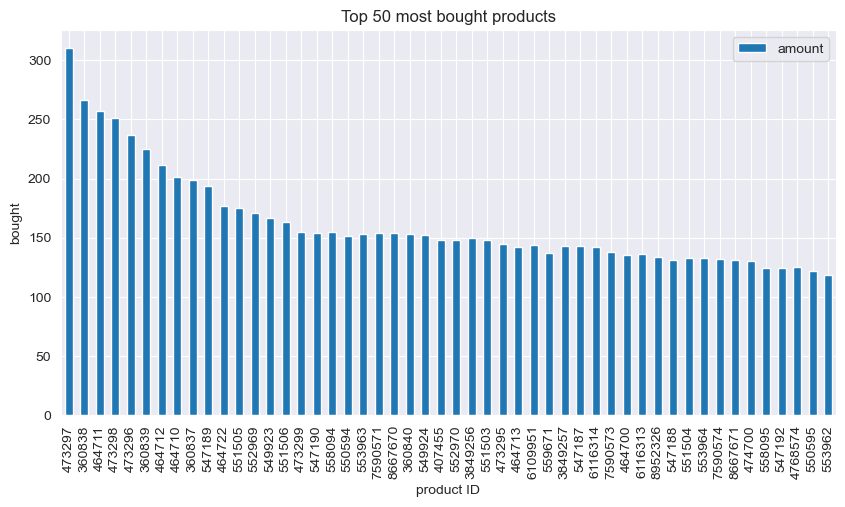

In [60]:
n = 50
ax = result_most_bought_products.nlargest(n, 'amount_sum').plot(kind='bar', y="amount_count", figsize=(10, 5))
ax.set_xlabel("product ID")
ax.set_ylabel("bought")
plt.title(f"Top {n} most bought products")
plt.legend(["amount", "amount_count"])
plt.show()

In [51]:
merged_df['customer__id'] = merged_df['customer__id'].astype(int)
result_most_buying_customers = merged_df.groupby('customer__id').agg({'amount': ['sum', 'count']})
result_most_buying_customers.columns = ['_'.join(col).strip() for col in result_most_buying_customers.columns.values]
result_most_buying_customers

customers_with_only_one_product = result_most_buying_customers[result_most_buying_customers['amount_sum'] == 1].amount_count.count()
print(str(customers_with_only_one_product)  + ' customers only bought one product\nThats ' +str(customers_with_only_one_product/ result_most_buying_customers.amount_count.count() * 100) + '% of all customers (' + str(result_most_buying_customers.amount_count.count()) + ')')
result_most_buying_customers

227108 customers only bought one product
Thats 63.47717445685744% of all customers (357779)


,amount_sum,amount_count
customer__id,,
1940761,8,8
1940767,2,2
1940775,3,3
1940782,2,2
1940806,1,1
...,...,...
11128024,2,2
11128039,1,1
11128082,1,1


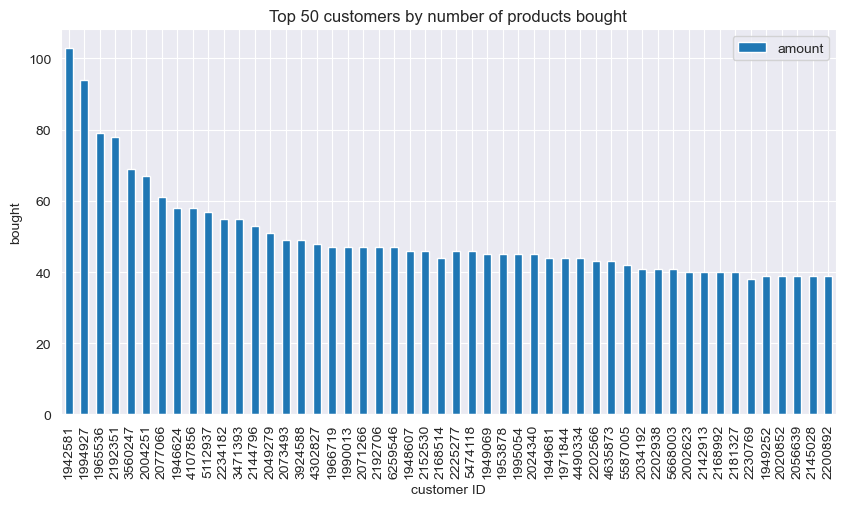

In [59]:
n = 50
ax = result_most_buying_customers.nlargest(n, 'amount_sum').plot(kind='bar', y="amount_count", figsize=(10, 5))
ax.set_xlabel("customer ID")
ax.set_ylabel("bought")
plt.title(f"Top {n} customers by number of products bought")
plt.legend(["amount", "amount_count"])
plt.show()

In [ ]:
# save datasets

In [ ]:
# basepath = '../datasets/preprocessed_datasets/gabor/'
# df_bag_data.to_pickle(basepath + 'bag_data.pkl')
# df_brand.to_pickle(basepath + 'brand_data.pkl')
# df_categories.to_pickle(basepath + 'category_data.pkl')
# df_orderitems.to_pickle(basepath + 'orderitem_data.pkl')
# df_orders.to_pickle(basepath + 'order_data.pkl')
# df_product_data.to_pickle(basepath + 'product_data.pkl')
# df_shoe_data.to_pickle(basepath + 'shoe_data.pkl')
# 
# 
# df_customer.to_pickle(basepath + 'customer_data.pkl')
# merged_df.to_pickle(basepath + 'product_data.pkl')
# merged_df_all_data.to_pickle(basepath + 'product_data_all_data.pkl')
# grouped_orders_by_customer.to_pickle(basepath + 'orders_and_products_by_customer.pkl')
# only_products.to_pickle(basepath + 'only_products.pkl')
# todo save mappings